# Setup

In [2]:
!pip install crcmod
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.7/89.7 kB 2.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for crcmod: filename=crcmod-1.7-cp311-cp311-linux_x86_64.whl size=31658 sha256=0808bcad90eda535bc1e48dd443062af2b1afaa4de8d02fa455d85a04d8874d7
  Stored in directory: /root/.cache/pip/wheels/23/94/7a/8cb7d14597e6395ce969933f01aed9ea8fa5f5b4d4c8a61e99
Successfully built crcmod


# Import data

In [3]:
#for getting with evenergy163.appspot.com folder
#!gsutil -m -o 'GSUtil:parallel_composite_upload_threshold_1M''GSUtil:sliced_object_download_max_components=8' cp -r gs://evenergy163.appspot.com/ .
!gsutil -m -o 'GSUtil:parallel_composite_upload_threshold_1M''GSUtil:sliced_object_download_max_components=8' cp -r gs://evenergy163.appspot.com/** .

Copying gs://evenergy163.appspot.com/HS861M 2010-.xlsx...
Copying gs://evenergy163.appspot.com/HS861 2010-.xlsx...
Copying gs://evenergy163.appspot.com/evwatts.public.evse.csv...
Copying gs://evenergy163.appspot.com/evwatts.public.vehicles.csv...
Copying gs://evenergy163.appspot.com/evwatts.public.connector.csv...
Copying gs://evenergy163.appspot.com/evwatts.public.session.csv...
Copying gs://evenergy163.appspot.com/annual_generation_state.xlsx...
Copying gs://evenergy163.appspot.com/evwatts.public.vehiclesessions.csv...
Copying gs://evenergy163.appspot.com/evwatts.public.dictionary.txt...
Copying gs://evenergy163.appspot.com/evwatts.public.vehicletrips.csv...
Copying gs://evenergy163.appspot.com/generation_monthly.xlsx...
/ [11/11 files][  1.6 GiB/  1.6 GiB] 100% Done  68.5 MiB/s ETA 00:00:00         
Operation completed over 11 objects/1.6 GiB.                                     


# Visualization anad analysis


## consumption and generation of energy


In [4]:
df_usage = pd.read_excel("HS861 2010-.xlsx", header=2)
df_usage = df_usage[['Year', 'STATE', 'Thousand Dollars.4', 'Megawatthours.4', 'Cents/kWh.4']]
df_usage = df_usage[df_usage['STATE'] == 'CA']
df_usage['Megawatthours.4'] = pd.to_numeric(df_usage['Megawatthours.4'], errors='coerce')

#fig = plt.figure(figsize=(10, 8))
#sns.lineplot(x=df_usage['Year'],
#             y=df_usage['Megawatthours.4'],
#             hue=df_usage['STATE'],
#             )

usage_stats = {
    'Mean': df_usage['Megawatthours.4'].mean(),
    'Median': df_usage['Megawatthours.4'].median(),
    'Standard Deviation': df_usage['Megawatthours.4'].std()
}
print("Electricity Usage Statistics:", usage_stats)

Electricity Usage Statistics: {'Mean': np.float64(255256427.92857143), 'Median': 257057286.0, 'Standard Deviation': 6679464.517647878}


This graph represents the total electric generation and consumption trends in California over time, spanning from 2010 to 2023. The blue line represents electricity generation, while the red line represents electricity consumption. The y-axis measures electricity in megawatt-hours (MWh), and the x-axis represents the years.

The red line (consumption) shows a gradual decline over the years, especially after 2015.
There are fluctuations, but the overall trend suggests that total electricity consumption in California has decreased.
The sharp decline in the final years could indicate changes in industrial demand, energy efficiency measures, or shifts in economic activity.

The blue line (generation) remains relatively low compared to consumption.
The trend initially declines but later rebounds around 2021–2023, indicating an increase in electricity generation capacity.
The generation data shows more year-to-year fluctuations compared to the steady decline in consumption.

Since the generation line is always below the consumption line, it indicates that California consistently imports electricity from other states or relies on alternative energy sources.
This gap suggests that California is not energy self-sufficient, which could impact energy prices and sustainability.

/usr/local/lib/python3.11/dist-packages/openpyxl/packaging/custom.py:213: UserWarning: Unknown type for {A44787D4-0540-4523-9961-78E4036D8C6D}
  warn(f"Unknown type for {prop.name}")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62282 entries, 0 to 62281
Data columns (total 5 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   YEAR                        62282 non-null  int64  
 1   STATE                       62282 non-null  object 
 2   TYPE OF PRODUCER            62282 non-null  object 
 3   ENERGY SOURCE               62282 non-null  object 
 4   GENERATION (Megawatthours)  62282 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 2.4+ MB


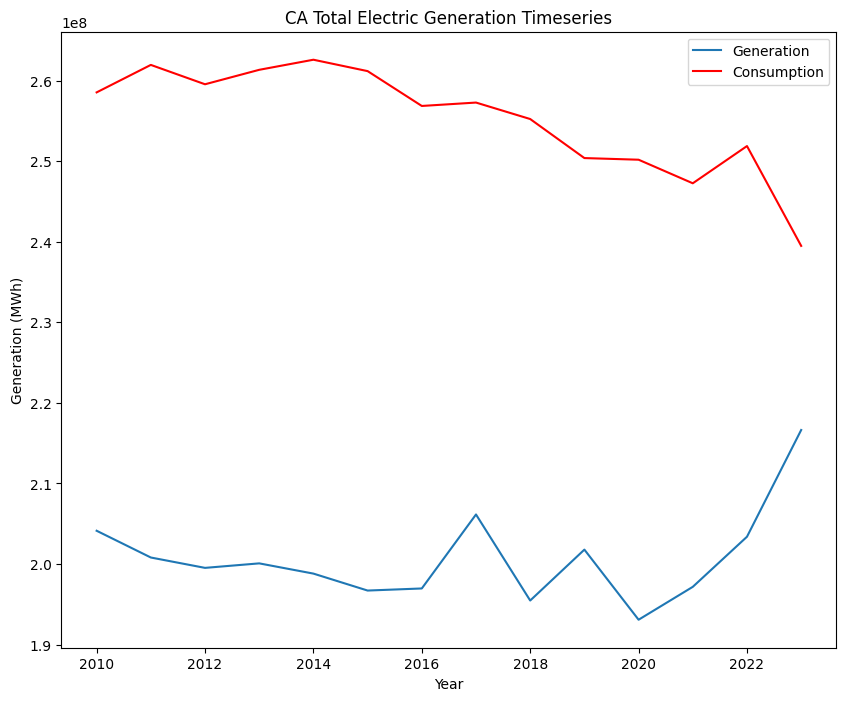

In [5]:
df = pd.read_excel("annual_generation_state.xlsx", header=1)
df.info()
df
test = df[(df['STATE'] == 'CA') & (df['ENERGY SOURCE'] == 'Total') & (df['YEAR'] >= 2010) & (df['TYPE OF PRODUCER'] == 'Total Electric Power Industry')]
#test = test.groupby(['YEAR'])['GENERATION (Megawatthours)'].sum().reset_index()
test
fig = plt.figure(figsize=(10, 8))
plt.plot(test['YEAR'], test['GENERATION (Megawatthours)'], label='Generation')
plt.plot(df_usage['Year'], df_usage['Megawatthours.4'], color='red', label='Consumption')
plt.title('CA Total Electric Generation Timeseries')
plt.xlabel('Year')
plt.ylabel('Generation (MWh)')
plt.legend()

This graph represents electricity consumption (measured in megawatt-hours) in California over time, spanning from 2010 to 2023. The y-axis represents electricity consumption, while the x-axis represents years.

From 2010 to approximately 2014, electricity consumption in California experienced a gradual increase, reaching a peak around 2014–2015.
This increase could be attributed to population growth, economic expansion, and increased energy demand from industries and households.

After peaking, the trend reversed, and consumption began to gradually decline.
The decline could be due to several factors, including:
Energy efficiency improvements in homes and businesses.
Increased adoption of renewable energy sources like solar panels reducing grid dependency.
Regulatory policies encouraging conservation and demand response programs.

The most striking feature of the graph is the sharp decline in electricity consumption after 2022.
This could be due to:
Policy changes affecting energy use.
A major economic downturn or industrial shift leading to reduced demand.
Improved efficiency technologies significantly reducing consumption.

In [6]:
generation_stats = {
    'Mean': test['GENERATION (Megawatthours)'].mean(),
    'Median': test['GENERATION (Megawatthours)'].median(),
    'Standard Deviation': test['GENERATION (Megawatthours)'].std()
}
print("Electricity Generation Statistics:", generation_stats)

Electricity Generation Statistics: {'Mean': np.float64(200761319.3642857), 'Median': 199797840.81, 'Standard Deviation': 5795653.620321197}


## EV dataset analysis

## where is the most used charging areas

In [7]:
session_data = pd.read_csv('evwatts.public.session.csv')
evse_data = pd.read_csv('evwatts.public.evse.csv')

In [8]:
#getting the most used EV service equipment
top10_evse = session_data.groupby('evse_id').size().sort_values(ascending=False).head(11) #11 because evse_id 23333 is missing for some reason.
top10_evse = top10_evse.reset_index()
top10_evse.columns = ['evse_id', 'use_count']
#top10_evse

In [9]:
top_evse = evse_data[evse_data['evse_id'].isin(top10_evse['evse_id'])]
top_evse = top_evse.merge(top10_evse, on='evse_id', how='left')
top_evse = top_evse.sort_values(by='use_count', ascending=False).reset_index(drop=True)
top_evse

,evse_id,metro_area,land_use,region,num_ports,charge_level,venue,pricing,use_count
0,18103,Undesignated,Metro Area,Pacific,1,DCFC,Corridor,Free,10066
1,18197,"Los Angeles-Long Beach-Anaheim, CA Metro Area",Metro Area,Pacific,1,DCFC,Undesignated,Free,10036
2,18186,"Los Angeles-Long Beach-Anaheim, CA Metro Area",Metro Area,Pacific,1,DCFC,Undesignated,Free,9605
3,18094,Undesignated,Metro Area,Pacific,1,DCFC,Corridor,Paid,9534
4,4569,"Burlington-South Burlington, VT Metro Area",Metro Area,New England,2,L2,Retail,Free,9345
5,1329,"Seattle-Tacoma-Bellevue, WA Metro Area",Metro Area,Pacific,1,DCFC,Undesignated,Paid,9158
6,1737,"Phoenix-Mesa-Chandler, AZ Metro Area",Metro Area,Mountain,1,DCFC,Undesignated,Free,9135
7,1735,"Phoenix-Mesa-Chandler, AZ Metro Area",Metro Area,Mountain,1,DCFC,Undesignated,Free,9112
8,18135,Undesignated,Metro Area,Pacific,1,DCFC,Undesignated,Free,9099
9,5230,"Phoenix-Mesa-Chandler, AZ Metro Area",Metro Area,Mountain,1,DCFC,Undesignated,Free,8871


In [10]:
session_filter = session_data[['evse_id', 'charge_duration', 'energy_kwh']]
#session_filter.groupby('evse_id').sum().sort_values(by='energy_kwh', ascending=False)
session_data#.groupby('evse_id')['energy_kwh'].sum().sort_values(ascending=False)
session_data['year'] = session_data['start_datetime'].str[:4]

In [11]:
top_evse_per_year = session_data.groupby(['year', 'evse_id'])['energy_kwh'].sum().reset_index()\
  .sort_values(['year', 'energy_kwh'], ascending=[True, False])\
  .groupby('year').head(5)
#top_evse_per_year

In [12]:
top_evse_per_year.merge(evse_data[['evse_id', 'metro_area', 'region']],on='evse_id', how='left')

,year,evse_id,energy_kwh,metro_area,region
0,2019,1084,31740.094021,"New York-Newark-Jersey City, NY-NJ-PA Metro Area",Middle Atlantic
1,2019,1081,31086.495941,"New York-Newark-Jersey City, NY-NJ-PA Metro Area",Middle Atlantic
2,2019,1080,31039.455941,"New York-Newark-Jersey City, NY-NJ-PA Metro Area",Middle Atlantic
3,2019,1079,30153.045901,"New York-Newark-Jersey City, NY-NJ-PA Metro Area",Middle Atlantic
4,2019,18281,27738.666994,Undesignated,Pacific
5,2020,1081,124786.342239,"New York-Newark-Jersey City, NY-NJ-PA Metro Area",Middle Atlantic
6,2020,1852,115938.693992,"New York-Newark-Jersey City, NY-NJ-PA Metro Area",Middle Atlantic
7,2020,1080,93179.767052,"New York-Newark-Jersey City, NY-NJ-PA Metro Area",Middle Atlantic
8,2020,1850,88809.571992,"New York-Newark-Jersey City, NY-NJ-PA Metro Area",Middle Atlantic
9,2020,18220,88233.583055,Undesignated,Pacific


It seems that most of the top used charging locations has free pricing, perhaps it only applies to this set of data collection. Also, the it seems that this data contains a lot of pacific region stations. The ranking as follows for United States is CA, WA, AZ. It also seem that they are all in some metro area. However, when it comes to the place with the most energy used, it was east coast around 2019 followed by west coast, then finally shifting to the highest in Arizona, california's neighboring state. evse_id 18000 appears to be in california LA, but marked as undesignated for privacy. However, perhaps it's because there are more charging stations on the west coast, that allows it to not show up on the most energy usage since, it could be possibly divided by a larger amount of charging stations.

## energy usage prediction on larger scale with synthetic data

In [13]:
ev_data = pd.read_csv("evwatts.public.vehiclesessions.csv")
ev_data

,id,vehicle_id,start_datetime,stop_datetime,duration,energy_kwh,soc_start,soc_stop,rucc_id,flag_id
0,19904,702,2021-03-09,NaN,1.956111,12.720231,90.0,90.0,1.0,0
1,19905,703,2021-03-09,NaN,6.950833,169.101094,55.0,90.0,1.0,0
2,19906,697,2021-03-09,NaN,3.346111,150.250031,60.0,90.0,1.0,16
3,19907,699,2021-03-09,NaN,0.433333,24.737317,85.0,90.0,1.0,16
4,19908,700,2021-03-09,NaN,2.033056,96.214313,30.0,50.0,1.0,16
...,...,...,...,...,...,...,...,...,...,...
182866,695138,291,2023-10-31 07:50:00,2023-10-31 08:00:00,0.138889,0.679000,0.0,5.0,1.0,512
182867,695139,949,2023-10-12 07:00:00,2023-10-12 08:30:00,1.547778,1.656000,90.0,100.0,1.0,0
182868,695140,949,2023-11-14 14:20:00,2023-11-14 14:30:00,0.192778,0.643770,0.0,5.0,5.0,512
182869,695141,949,2023-11-22 14:00:00,2023-11-22 14:10:00,0.112778,0.552000,NaN,NaN,1.0,512


## Combining energy with EV dataset

## How much energy generated and consumed, and future requirements of EV growth

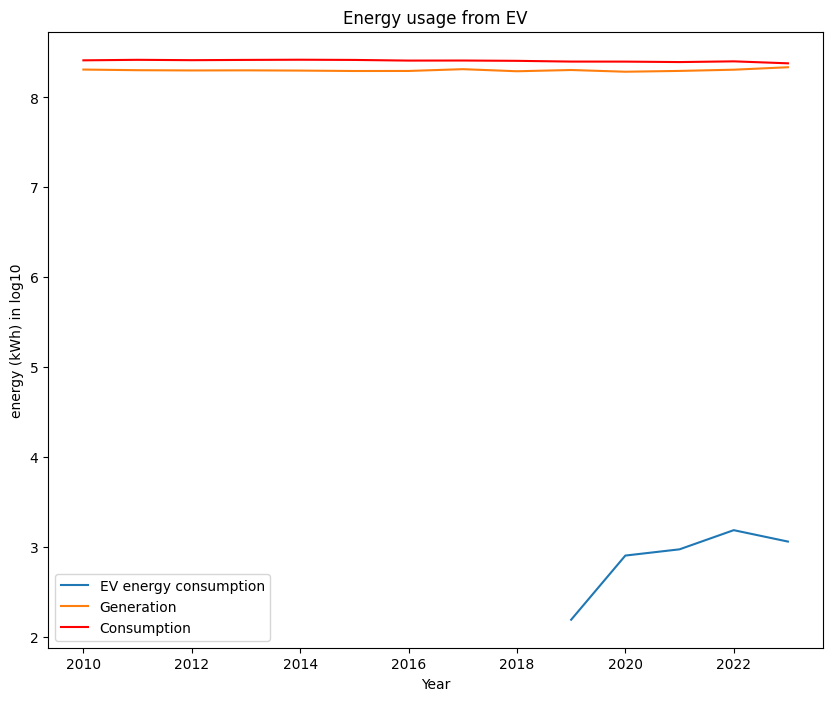

In [14]:
#ev_data = pd.read_csv("evwatts.public.vehiclesessions.csv")
ev_data['charge_year'] = pd.to_numeric(ev_data['start_datetime'].str[:4])

vehicle_data = pd.read_csv('evwatts.public.vehicles.csv')
id_to_state = dict(zip(vehicle_data['id'], vehicle_data['state']))

ev_data['state'] = ev_data['vehicle_id'].map(id_to_state)

grouped_ev_data = ev_data.groupby(['charge_year', 'state'])['energy_kwh'].sum().reset_index()
grouped_ev_data['energy_mwh'] = grouped_ev_data['energy_kwh'] / 1000

ca_grouped_data = grouped_ev_data[grouped_ev_data['state'] == 'California'].reset_index()

ca_grouped_data = grouped_ev_data[grouped_ev_data['state'] == 'California']
fig = plt.figure(figsize=(10,8))
sns.lineplot(x=ca_grouped_data['charge_year'],
             y=np.log10(ca_grouped_data['energy_mwh']),
             label='EV energy consumption'
            )
plt.plot(test['YEAR'], np.log10(test['GENERATION (Megawatthours)']), label='Generation')
plt.plot(df_usage['Year'], np.log10(df_usage['Megawatthours.4']), color='red', label='Consumption')

plt.title("Energy usage from EV")
plt.xlabel("Year")
plt.ylabel("energy (kWh) in log10")
plt.legend()

In [15]:
ev_data['energy_mwh'] = ev_data['energy_kwh'] / 1000
#ev_data.groupby(['state', 'charge_year'])['energy_mwh'].sum().reset_index().sort_values(by=['state','energy_mwh'], ascending=False)

In [16]:
session_data.head(5)

,session_id,evse_id,connector_id,start_datetime,end_datetime,total_duration,charge_duration,energy_kwh,start_soc,end_soc,flag_id,year
0,11562,5,5,2020-03-01 09:37:44,2020-03-01 11:14:59,1.621389,1.615556,6.170,NaN,NaN,0,2020
1,11563,116,116,2020-03-01 10:02:24,2020-03-01 11:08:14,1.096944,1.089722,5.212,NaN,NaN,0,2020
2,11564,72,72,2020-03-01 10:06:08,2020-03-01 11:08:10,1.033611,1.024722,3.392,NaN,NaN,0,2020
3,11565,1,1,2020-03-01 10:01:12,2020-03-01 11:07:09,1.099722,1.076111,6.521,NaN,NaN,0,2020
4,11566,0,138,2020-02-29 19:09:03,2020-03-01 10:47:16,15.636667,12.658889,80.527,NaN,NaN,0,2020


In [17]:
evse_data.head(1)

,evse_id,metro_area,land_use,region,num_ports,charge_level,venue,pricing
0,6034,Undesignated,Metro Area,Mountain,1,DCFC,Corridor,Paid


In [56]:
evse_avg = session_data.groupby(['evse_id','year'])['energy_kwh'].sum().reset_index()
#evse_avg = evse_avg.merge(evse_data[['evse_id', 'metro_area', 'region']], on='evse_id', how='left')

#need to find the avg for each year to find trend
#the mean wouldn't really work here since the mean of all sessions is very small, so a summation will be used.

<Axes: xlabel='year', ylabel='energy_kwh'>

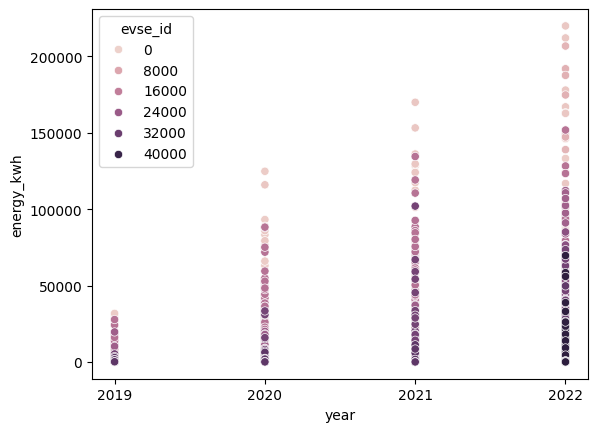

In [57]:
sns.scatterplot(data=evse_avg, x='year', y='energy_kwh', hue='evse_id', marker='o')


<ipython-input-21-12b509198c3b>:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='EVSE ID', bbox_to_anchor=(1.05, 1), loc='upper left')


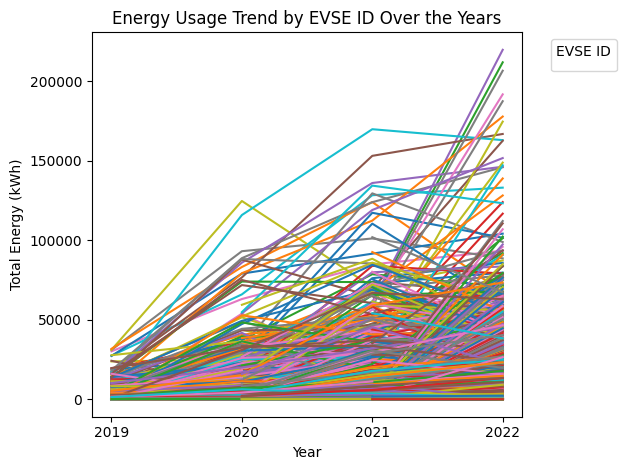

In [21]:
pivot_trend = evse_avg.pivot(index='year', columns='evse_id', values='energy_kwh')

plt.plot(pivot_trend)
plt.title('Energy Usage Trend by EVSE ID Over the Years')
plt.xlabel('Year')
plt.ylabel('Total Energy (kWh)')
plt.legend(title='EVSE ID', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

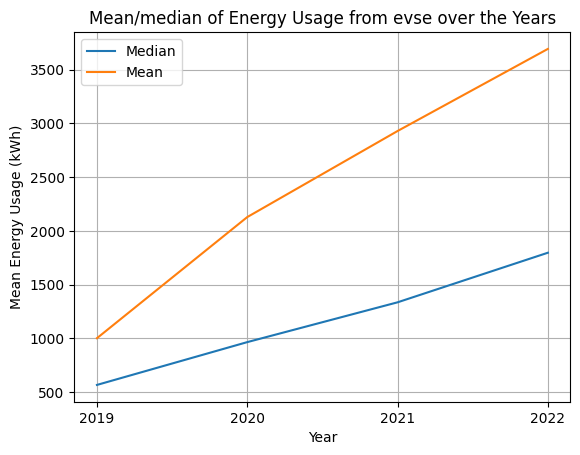

In [41]:
mean_energy_usage = evse_avg.groupby('year')['energy_kwh'].mean().reset_index()
#mean_energy_usage

median_energy_usage = evse_avg.groupby('year')['energy_kwh'].median().reset_index()
#median_energy_usage

plt.plot(median_energy_usage['year'], median_energy_usage['energy_kwh'], label='Median')
plt.plot(mean_energy_usage['year'], mean_energy_usage['energy_kwh'], label='Mean')
plt.title('Mean/median of Energy Usage from evse over the Years')
plt.xlabel('Year')
plt.ylabel('Mean Energy Usage (kWh)')
plt.legend()
plt.grid(True)

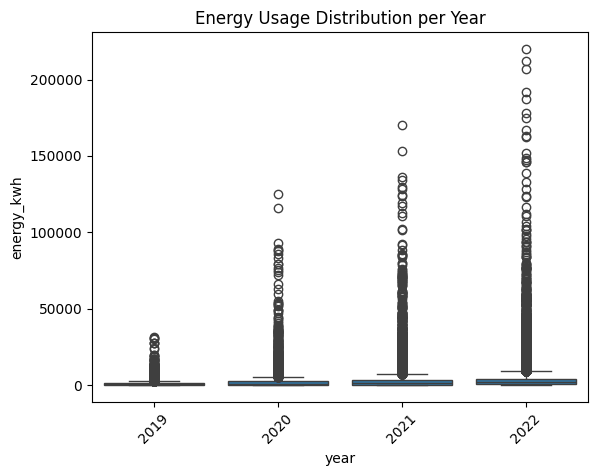

In [44]:
sns.boxplot(data=evse_avg, x='year', y='energy_kwh')
plt.title("Energy Usage Distribution per Year")
plt.xticks(rotation=45)
plt.show()

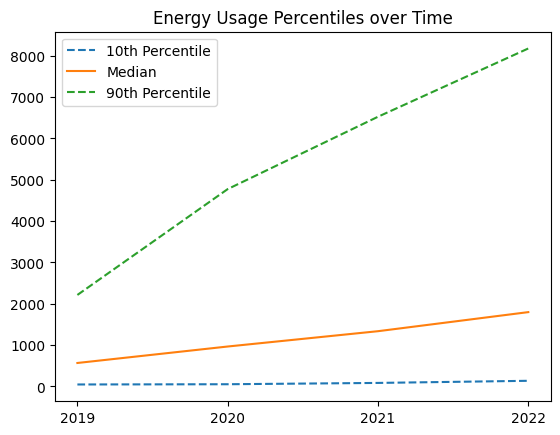

In [46]:
#observing 10th, 50th, and 90th percentile's changes over time.
quantiles = evse_avg.groupby('year')['energy_kwh'].quantile([0.1, 0.5, 0.9]).unstack()
plt.plot(quantiles.index, quantiles[0.1], linestyle='--', label='10th Percentile')
plt.plot(quantiles.index, quantiles[0.5], label='Median')
plt.plot(quantiles.index, quantiles[0.9], linestyle='--', label='90th Percentile')
plt.legend()
plt.title("Energy Usage Percentiles over Time")
plt.show()
